### Importación de librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns 
import scipy.cluster.hierarchy as sch

from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [117]:
os.getcwd()

'C:\\Users\\Usuari\\Documents\\Master\\DA y Big Data\\2 Cuatrimestre\\TFM\\Clusterización'

### Carga del dataframe

In [97]:
df = pd.read_json('Sesiones_Web_sesionesweb_20170703.json', lines=True)

In [98]:
df.head()

,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,channelGrouping,socialEngagementType
0,156,1499068772,1499068772,20170703,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': '(direct)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...","[{'index': '4', 'value': 'APAC'}]","[{'hitNumber': '1', 'time': '0', 'hour': '0', ...",4.405445e+18,Direct,Not Socially Engaged
1,2,1499128916,1499128916,20170703,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': '4', 'value': 'North America'}]","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",2.475928e+18,Organic Search,Not Socially Engaged
2,1,1499107440,1499107440,20170703,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...","[{'index': '4', 'value': 'EMEA'}]","[{'hitNumber': '1', 'time': '0', 'hour': '11',...",1.671700e+18,Organic Search,Not Socially Engaged
3,1,1499134014,1499134014,20170703,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Eastern...","[{'index': '4', 'value': 'APAC'}]","[{'hitNumber': '1', 'time': '0', 'hour': '19',...",1.085204e+16,Organic Search,Not Socially Engaged
4,1,1499149456,1499149456,20170703,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': '4', 'value': 'EMEA'}]","[{'hitNumber': '1', 'time': '0', 'hour': '23',...",4.299965e+17,Organic Search,Not Socially Engaged


A continuación, se procede a ver el tipo de los diferentes campos

In [35]:
df.dtypes

visitNumber               int64
visitId                   int64
visitStartTime            int64
date                      int64
totals                   object
trafficSource            object
device                   object
geoNetwork               object
customDimensions         object
hits                     object
fullVisitorId           float64
channelGrouping          object
socialEngagementType     object
dtype: object

Una vez identificados aquellos campos que nos proporcionan la información o datos adecuados o que nos interesan para poder llevar a cabo la clusterización y predicciones de sesiones web, se procede a su extracción para su posterior curación. 

Primero de todo, se extrae el campo totals que contiene la cantidad de páginas visitadas, el total de transacciones realizadas, el tiempo invertido en el sitio web y si se trata de una nueva visita o no, entre otros. 

In [37]:
df_totals = df.loc[:, "totals"]

In [38]:
df_totals

0       {'visits': '1', 'hits': '1', 'pageviews': '1',...
1       {'visits': '1', 'hits': '1', 'pageviews': '1',...
2       {'visits': '1', 'hits': '1', 'pageviews': '1',...
3       {'visits': '1', 'hits': '1', 'pageviews': '1',...
4       {'visits': '1', 'hits': '1', 'pageviews': '1',...
                              ...                        
2041    {'visits': '1', 'hits': '23', 'pageviews': '13...
2042    {'visits': '1', 'hits': '24', 'pageviews': '13...
2043    {'visits': '1', 'hits': '24', 'pageviews': '16...
2044    {'visits': '1', 'hits': '25', 'pageviews': '13...
2045    {'visits': '1', 'hits': '43', 'pageviews': '25...
Name: totals, Length: 2046, dtype: object

In [93]:
df_totals = df_totals.to_frame()

In [94]:
df_totals

,totals
0,"{'visits': '1', 'hits': '1', 'pageviews': '1',..."
1,"{'visits': '1', 'hits': '1', 'pageviews': '1',..."
2,"{'visits': '1', 'hits': '1', 'pageviews': '1',..."
3,"{'visits': '1', 'hits': '1', 'pageviews': '1',..."
4,"{'visits': '1', 'hits': '1', 'pageviews': '1',..."
...,...
2041,"{'visits': '1', 'hits': '23', 'pageviews': '13..."
2042,"{'visits': '1', 'hits': '24', 'pageviews': '13..."
2043,"{'visits': '1', 'hits': '24', 'pageviews': '16..."
2044,"{'visits': '1', 'hits': '25', 'pageviews': '13..."


In [95]:
df_totals.to_csv(r'C:\\Users\\Usuari\\Documents\\Master\\DA y Big Data\\2 Cuatrimestre\\TFM\\Clusterización\File Name.csv', index=True)

Acto seguido, se extrae el campo Device. Dicho campo nos indica si la sesión se está o se ha llevado a cabo desde un escritorio, un móvil o bien una tablet. 

In [99]:
df_device = df.loc[ : ,"device"]

In [100]:
df_device

0       {'browser': 'Chrome', 'browserVersion': 'not a...
1       {'browser': 'Chrome', 'browserVersion': 'not a...
2       {'browser': 'Safari', 'browserVersion': 'not a...
3       {'browser': 'Chrome', 'browserVersion': 'not a...
4       {'browser': 'Chrome', 'browserVersion': 'not a...
                              ...                        
2041    {'browser': 'Safari', 'browserVersion': 'not a...
2042    {'browser': 'Chrome', 'browserVersion': 'not a...
2043    {'browser': 'Chrome', 'browserVersion': 'not a...
2044    {'browser': 'Chrome', 'browserVersion': 'not a...
2045    {'browser': 'Chrome', 'browserVersion': 'not a...
Name: device, Length: 2046, dtype: object

In [101]:
df_device = df_device.to_frame()

In [102]:
df_device.to_csv(r'C:\\Users\\Usuari\\Documents\\Master\\DA y Big Data\\2 Cuatrimestre\\TFM\\Clusterización\Device.csv', index=True)

Finalmente, se extrae el campo trafficSource.

In [103]:
df_trafficSource = df.loc[:,"trafficSource"]

In [104]:
df_trafficSource

0       {'campaign': '(not set)', 'source': '(direct)'...
1       {'campaign': '(not set)', 'source': 'google', ...
2       {'campaign': '(not set)', 'source': 'google', ...
3       {'campaign': '(not set)', 'source': 'google', ...
4       {'campaign': '(not set)', 'source': 'google', ...
                              ...                        
2041    {'referralPath': '/intl/ar/yt/about/copyright/...
2042    {'referralPath': '/yt/about/', 'campaign': '(n...
2043    {'referralPath': '/', 'campaign': '(not set)',...
2044    {'referralPath': '/intl/pt-BR/yt/about/press/'...
2045    {'referralPath': '/intl/it/yt/about/copyright/...
Name: trafficSource, Length: 2046, dtype: object

In [105]:
df_trafficSource = df_trafficSource.to_frame()

In [2]:
df_trafficSource.to_csv(r'C:\\Users\\Usuari\\Documents\\Master\\DA y Big Data\\2 Cuatrimestre\\TFM\\Clusterización\trafficSource.csv', index=True)

NameError: name 'df_trafficSource' is not defined

Una vez disponemos de los csv con los datos que nos interesan, los importamos de nuevo en formato dataframe para, posteriormente, concatenarlos en uno solo. 

In [3]:
data_totals = pd.read_csv('totals.csv', delimiter=";")

In [4]:
data_totals

,Unnamed: 0,visits,hits,pageviews,timeOnSite,newVisits,transactions
0,0,1,1,1,NaN,NaN,NaN
1,1,1,1,1,NaN,NaN,NaN
2,2,1,1,1,NaN,1.0,NaN
3,3,1,1,1,NaN,1.0,NaN
4,4,1,1,1,NaN,1.0,NaN
...,...,...,...,...,...,...,...
2041,2041,1,23,13,404.0,1.0,NaN
2042,2042,1,24,13,288.0,1.0,NaN
2043,2043,1,24,16,1020.0,1.0,NaN
2044,2044,1,25,13,12.0,1.0,NaN


In [5]:
data_totals.columns = ['id', 'visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions']

In [6]:
data_totals

,id,visits,hits,pageviews,timeOnSite,newVisits,transactions
0,0,1,1,1,NaN,NaN,NaN
1,1,1,1,1,NaN,NaN,NaN
2,2,1,1,1,NaN,1.0,NaN
3,3,1,1,1,NaN,1.0,NaN
4,4,1,1,1,NaN,1.0,NaN
...,...,...,...,...,...,...,...
2041,2041,1,23,13,404.0,1.0,NaN
2042,2042,1,24,13,288.0,1.0,NaN
2043,2043,1,24,16,1020.0,1.0,NaN
2044,2044,1,25,13,12.0,1.0,NaN


In [7]:
print(data_totals['visits'].value_counts())

1    2046
Name: visits, dtype: int64


In [8]:
print(data_totals['hits'].value_counts())

1      1136
2       267
3       144
4        87
5        71
6        61
7        41
8        32
9        25
11       23
10       15
14       12
12       12
17       11
13       10
15       10
16        8
20        8
19        7
23        6
27        6
21        6
24        5
22        4
18        4
28        4
32        3
100       2
36        2
33        2
30        2
29        2
43        2
92        1
45        1
58        1
54        1
51        1
50        1
46        1
26        1
41        1
40        1
39        1
38        1
37        1
34        1
31        1
25        1
Name: hits, dtype: int64


In [9]:
print(data_totals['pageviews'].value_counts())

1     1147
2      276
3      151
4      105
5       75
6       55
7       55
8       25
9       25
10      16
13      14
12      11
11      10
14       9
15       9
17       7
19       7
16       6
21       5
18       5
22       3
25       3
29       3
28       3
27       3
30       3
20       2
23       2
24       2
32       2
38       2
26       1
36       1
65       1
69       1
64       1
Name: pageviews, dtype: int64


In [10]:
print(data_totals['timeOnSite'].value_counts())

9.0       15
10.0      13
13.0      12
15.0      11
6.0        9
          ..
124.0      1
110.0      1
263.0      1
1120.0     1
1020.0     1
Name: timeOnSite, Length: 421, dtype: int64


In [11]:
print(data_totals['newVisits'].value_counts())

1.0    1655
Name: newVisits, dtype: int64


In [12]:
print(data_totals['transactions'].value_counts())

1.0    11
2.0     2
Name: transactions, dtype: int64


In [13]:
data_totals.fillna({'timeOnSite': 0 }, inplace=True)

In [14]:
print(data_totals['timeOnSite'].value_counts())

0.0       1143
9.0         15
10.0        13
13.0        12
15.0        11
          ... 
124.0        1
110.0        1
263.0        1
1120.0       1
1020.0       1
Name: timeOnSite, Length: 422, dtype: int64


In [15]:
data_totals.fillna({'newVisits': 0 }, inplace=True)

In [16]:
print(data_totals['newVisits'].value_counts())

1.0    1655
0.0     391
Name: newVisits, dtype: int64


In [17]:
data_totals.fillna({'transactions': 0 }, inplace=True)

In [18]:
print(data_totals['transactions'].value_counts())

0.0    2033
1.0      11
2.0       2
Name: transactions, dtype: int64


Se importa de nuevo device.csv

In [19]:
data_device = pd.read_csv('device.csv', delimiter=";")

In [20]:
data_device

,Unnamed: 0,deviceCategory,isDesktop,isMobile,isTablet
0,0,desktop,1,0,0
1,1,tablet,0,0,1
2,2,desktop,1,0,0
3,3,desktop,1,0,0
4,4,desktop,1,0,0
...,...,...,...,...,...
2041,2041,mobile,0,1,0
2042,2042,desktop,1,0,0
2043,2043,desktop,1,0,0
2044,2044,desktop,1,0,0


In [21]:
data_device.columns = ['id', 'deviceCategory', 'isDesktop', 'isMobile', 'isTablet']

In [22]:
data_device

,id,deviceCategory,isDesktop,isMobile,isTablet
0,0,desktop,1,0,0
1,1,tablet,0,0,1
2,2,desktop,1,0,0
3,3,desktop,1,0,0
4,4,desktop,1,0,0
...,...,...,...,...,...
2041,2041,mobile,0,1,0
2042,2042,desktop,1,0,0
2043,2043,desktop,1,0,0
2044,2044,desktop,1,0,0


Se procede a importar de nuevo trafficSource

In [23]:
data_trafficSource = pd.read_csv('trafficSource.csv', delimiter=";")

In [24]:
data_trafficSource

,Unnamed: 0,medium,isPaidTraffic
0,0,none,0
1,1,organic,0
2,2,organic,0
3,3,organic,0
4,4,organic,0
...,...,...,...
2041,2041,referral,0
2042,2042,referral,0
2043,2043,referral,0
2044,2044,referral,0


In [25]:
data_trafficSource.columns = ['id', 'medium', 'isPaidTraffic']

In [26]:
data_trafficSource

,id,medium,isPaidTraffic
0,0,none,0
1,1,organic,0
2,2,organic,0
3,3,organic,0
4,4,organic,0
...,...,...,...
2041,2041,referral,0
2042,2042,referral,0
2043,2043,referral,0
2044,2044,referral,0


Una vez se ha llevado a cabo el preprocesamiento de datos, se procede a unir los diferentes dataframes parciales. Primero de todo, se hace la unión parcial del dataframe data_totals con data_device. La columna utilizada para dicha unión será id. 

In [27]:
data_med= pd.merge(data_totals, data_device, on='id')

In [28]:
data_med

,id,visits,hits,pageviews,timeOnSite,newVisits,transactions,deviceCategory,isDesktop,isMobile,isTablet
0,0,1,1,1,0.0,0.0,0.0,desktop,1,0,0
1,1,1,1,1,0.0,0.0,0.0,tablet,0,0,1
2,2,1,1,1,0.0,1.0,0.0,desktop,1,0,0
3,3,1,1,1,0.0,1.0,0.0,desktop,1,0,0
4,4,1,1,1,0.0,1.0,0.0,desktop,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2041,2041,1,23,13,404.0,1.0,0.0,mobile,0,1,0
2042,2042,1,24,13,288.0,1.0,0.0,desktop,1,0,0
2043,2043,1,24,16,1020.0,1.0,0.0,desktop,1,0,0
2044,2044,1,25,13,12.0,1.0,0.0,desktop,1,0,0


Acto seguido, se unirá el dataframe unido anteriormente data_med con data_trafficSource. 

In [29]:
data = pd.merge(data_med, data_trafficSource, on='id')

In [30]:
data

,id,visits,hits,pageviews,timeOnSite,newVisits,transactions,deviceCategory,isDesktop,isMobile,isTablet,medium,isPaidTraffic
0,0,1,1,1,0.0,0.0,0.0,desktop,1,0,0,none,0
1,1,1,1,1,0.0,0.0,0.0,tablet,0,0,1,organic,0
2,2,1,1,1,0.0,1.0,0.0,desktop,1,0,0,organic,0
3,3,1,1,1,0.0,1.0,0.0,desktop,1,0,0,organic,0
4,4,1,1,1,0.0,1.0,0.0,desktop,1,0,0,organic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2041,1,23,13,404.0,1.0,0.0,mobile,0,1,0,referral,0
2042,2042,1,24,13,288.0,1.0,0.0,desktop,1,0,0,referral,0
2043,2043,1,24,16,1020.0,1.0,0.0,desktop,1,0,0,referral,0
2044,2044,1,25,13,12.0,1.0,0.0,desktop,1,0,0,referral,0


Comprobaciones

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2045
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2046 non-null   int64  
 1   visits          2046 non-null   int64  
 2   hits            2046 non-null   int64  
 3   pageviews       2046 non-null   int64  
 4   timeOnSite      2046 non-null   float64
 5   newVisits       2046 non-null   float64
 6   transactions    2046 non-null   float64
 7   deviceCategory  2046 non-null   object 
 8   isDesktop       2046 non-null   int64  
 9   isMobile        2046 non-null   int64  
 10  isTablet        2046 non-null   int64  
 11  medium          2046 non-null   object 
 12  isPaidTraffic   2046 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 223.8+ KB


In [32]:
print(data['isDesktop'].value_counts())

1    1234
0     812
Name: isDesktop, dtype: int64


In [33]:
print(data['isMobile'].value_counts())

0    1357
1     689
Name: isMobile, dtype: int64


In [34]:
print(data['isTablet'].value_counts())

0    1923
1     123
Name: isTablet, dtype: int64


In [35]:
data = data.drop(['id','deviceCategory','medium'], axis=1)

In [36]:
data

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,1,1,1,0.0,0.0,0.0,1,0,0,0
1,1,1,1,0.0,0.0,0.0,0,0,1,0
2,1,1,1,0.0,1.0,0.0,1,0,0,0
3,1,1,1,0.0,1.0,0.0,1,0,0,0
4,1,1,1,0.0,1.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2041,1,23,13,404.0,1.0,0.0,0,1,0,0
2042,1,24,13,288.0,1.0,0.0,1,0,0,0
2043,1,24,16,1020.0,1.0,0.0,1,0,0,0
2044,1,25,13,12.0,1.0,0.0,1,0,0,0


# 1. Clusterización k-means

## 1.1 Datos sin normalizar

### 1.1.1 Elbow Method

Primero de todo, se debe decidir cuantos clusters se van a utilizar. En el análisis de clustering, el método del codo es una heurística utilizada para determinar el número de clusters adecuados a un determinado conjunto de datos. El método consiste en trazar la variación en función del número de clusters y elegir el codo de la curva como el número de clusters a utilizar. 

In [36]:
# Encontrar el número de clusters

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

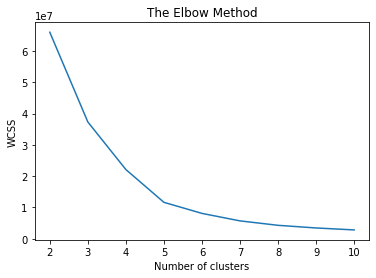

In [37]:
# Código para representar gráficamente el método del codo (Elbow Method)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Una vez visualizado el método del codo, nos quedamos con el último punto de inflexión (cambio de pendiente). En este caso, número de clusters = 5. 

### 1.1.2 Definición de cluster k-means++

In [38]:
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42).fit(data)
data['cluster'] = kmeans.labels_
data.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster
0,1,1,1,0.0,0.0,0.0,1,0,0,0,0
1,1,1,1,0.0,0.0,0.0,0,0,1,0,0
2,1,1,1,0.0,1.0,0.0,1,0,0,0,0
3,1,1,1,0.0,1.0,0.0,1,0,0,0,0
4,1,1,1,0.0,1.0,0.0,1,0,0,0,0


In [39]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.00000000e+00 2.11085714e+00 1.90285714e+00 2.12611429e+01
  8.23428571e-01 5.20417043e-18 5.92000000e-01 3.44571429e-01
  6.34285714e-02 8.17142857e-02]
 [1.00000000e+00 1.71463415e+01 1.36585366e+01 1.76287805e+03
  4.63414634e-01 1.21951220e-01 7.56097561e-01 1.95121951e-01
  4.87804878e-02 1.46341463e-01]
 [1.00000000e+00 1.70333333e+01 1.33666667e+01 9.55766667e+02
  6.83333333e-01 8.33333333e-02 7.00000000e-01 2.83333333e-01
  1.66666667e-02 8.33333333e-02]
 [1.00000000e+00 1.12279793e+01 8.89637306e+00 3.51538860e+02
  7.87564767e-01 2.59067358e-02 6.37305699e-01 3.16062176e-01
  4.66321244e-02 7.77202073e-02]
 [1.00000000e+00 5.95000000e+01 4.15000000e+01 4.46250000e+03
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [40]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])

centers['freq']=data['cluster'].value_counts()
centers['freq_r']=data['cluster'].value_counts(normalize=True)
print(centers)

   visits       hits  pageviews   timeOnSite  newVisits  transactions  \
0     1.0   2.110857   1.902857    21.261143   0.823429  5.204170e-18   
1     1.0  17.146341  13.658537  1762.878049   0.463415  1.219512e-01   
2     1.0  17.033333  13.366667   955.766667   0.683333  8.333333e-02   
3     1.0  11.227979   8.896373   351.538860   0.787565  2.590674e-02   
4     1.0  59.500000  41.500000  4462.500000   1.000000  0.000000e+00   

   isDesktop  isMobile  isTablet  isPaidTraffic  freq    freq_r  
0   0.592000  0.344571  0.063429       0.081714  1749  0.854839  
1   0.756098  0.195122  0.048780       0.146341    41  0.020039  
2   0.700000  0.283333  0.016667       0.083333    60  0.029326  
3   0.637306  0.316062  0.046632       0.077720   194  0.094819  
4   1.000000  0.000000  0.000000       0.000000     2  0.000978  


### 1.1.3 Visualización clusters con dos variables

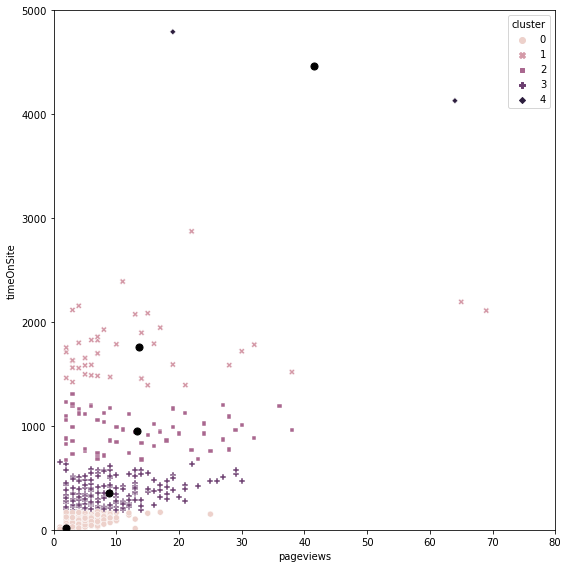

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='pageviews', y='timeOnSite', hue='cluster', style='cluster', 
                     ax=ax, data=data)
ax.set_xlim(0, 80)
ax.set_ylim(0, 5000)
centers.plot.scatter(x='pageviews', y='timeOnSite', ax=ax, s=50, color='black')
plt.tight_layout()
plt.show()

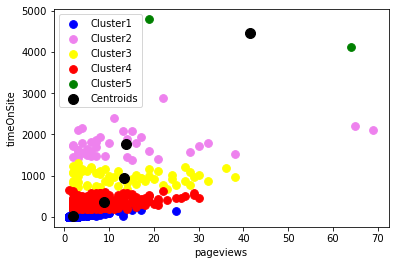

In [42]:
plt.scatter(data[data['cluster']==0]['pageviews'], data[data['cluster']==0]['timeOnSite'], s = 60, c = 'blue', label = 'Cluster1')
plt.scatter(data[data['cluster']==1]['pageviews'], data[data['cluster']==1]['timeOnSite'], s = 60, c = 'violet', label = 'Cluster2')
plt.scatter(data[data['cluster']==2]['pageviews'], data[data['cluster']==2]['timeOnSite'], s = 60, c = 'yellow', label = 'Cluster3')
plt.scatter(data[data['cluster']==3]['pageviews'], data[data['cluster']==3]['timeOnSite'], s = 60, c = 'red', label = 'Cluster4')
plt.scatter(data[data['cluster']==4]['pageviews'], data[data['cluster']==4]['timeOnSite'], s = 60, c = 'green', label = 'Cluster5') 
plt.scatter(centers['pageviews'], centers['timeOnSite'], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('pageviews') 
plt.ylabel('timeOnSite') 
plt.legend()             
plt.show()

### 1.1.4 Evaluación. Silhouette score

Para la evaluación del cluster generado, se utiliza la medida silhouette score, índice que indica que tan cohesionados están los elementos en los clusteres. Es una medida que compara las distancias de cada elemento dentro de su cluster frente al cluster más cercano. Puede tomar valores entre -1 y 1:
- Valor cuanto más cercano a 1 significa que la cohesión de los clusteres es mejor. 
- Entre 0.4 y 0.7, es aceptable; mientras que, si es superior a 0.7, muy buena score de silhouette. 
- Un valor cercano a 0, dudamos de lo que hicimos. 
- Score negativo significa que los valores o clasificación debería pertenencer a otro segmento, es decir, que la clusterización quedó mal hecha. 

In [43]:
data['S_S'] = silhouette_samples(data,data['cluster'])
silhouette_score_mean = silhouette_score(data,data['cluster'])
print(silhouette_score_mean)

0.8262813987300258


Tal y como se puede observar, se consigue un valor de silhouette superior a 0.7 (concretamente, 0.826). Por lo tanto, utilizando el k-means++, conseguimos una muy buena score de silhouette y, por lo tanto, una buena cohesión de los clusteres. 

Cabe destacar que el campo S_S calcula el valor de silhouette score para cada uno de los clusteres conformados. De esta manera, se puede ver cuales son los que están más cohesionados, cuales son más homogéneos, dándole más fuerza a un perfilamiento de segmentos. 

In [44]:
data

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster,S_S
0,1,1,1,0.0,0.0,0.0,1,0,0,0,0,0.937147
1,1,1,1,0.0,0.0,0.0,0,0,1,0,0,0.936293
2,1,1,1,0.0,1.0,0.0,1,0,0,0,0,0.938049
3,1,1,1,0.0,1.0,0.0,1,0,0,0,0,0.938049
4,1,1,1,0.0,1.0,0.0,1,0,0,0,0,0.938049
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1,23,13,404.0,1.0,0.0,0,1,0,0,3,0.688660
2042,1,24,13,288.0,1.0,0.0,1,0,0,0,3,0.584701
2043,1,24,16,1020.0,1.0,0.0,1,0,0,0,2,0.760470
2044,1,25,13,12.0,1.0,0.0,1,0,0,0,0,0.881754


## 1.2 Clusterización con k-means++ y datos normalizados (StandardScale)

Si no se estandarizan los datos, aquellas variables o campos con mayor escala, llevan la segmentación a su favor, la ponderan a su favor, es decir, influyen más que otras variables con una escala menor a la hora de llevar a cabo la segmentación. 

En una primera instancia, se va a utilizar el Standard Scale que resta cada valor por la media del campo al cual pertenece dicho valor y se divide por la desviación estándar del campo. De esta manera, cada variable va a estar en función del número de desviaciones estándar respecto a su media. 

In [45]:
data1 = data
data1 = data1.drop(['cluster','S_S'], axis=1)

data_sd = preprocessing.scale(data1)
data_sd = pd.DataFrame(data_sd, columns = ['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])
data_sd.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,0.811186,-0.712557,-0.252908,-0.300062
1,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,-1.232763,-0.712557,3.954004,-0.300062
2,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062
3,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062
4,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062


### 1.2.1 Elbow Method

In [46]:
# Encontrar el número de clusters

wcss = []
for i in range(2, 11):
    kmeans_sd = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans_sd.fit(data_sd)
    wcss.append(kmeans_sd.inertia_)

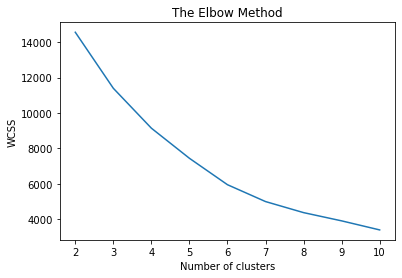

In [47]:
# Código para representar gráficamente el método del codo (Elbow Method)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Una vez visualizado el método del codo, nos quedamos con el último punto de inflexión (cambio de pendiente). En este caso, a pesar de que es complicado intuirlo a simple vista, se selecciona número de clusters = 6 ya que parece que es el último cambio de pendiente.

### 1.2.2 Definición de cluster k-means++

In [48]:
warnings.filterwarnings('ignore')
kmeans_sd = KMeans(n_clusters = 7, init = "k-means++", random_state = 42).fit(data_sd)
data_sd['cluster'] = kmeans_sd.labels_
data_sd.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster
0,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,1
1,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,-1.232763,-0.712557,3.954004,-0.300062,3
2,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2
3,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2
4,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2


In [49]:
centroids_sd = kmeans_sd.cluster_centers_
print(centroids_sd)

[[ 0.00000000e+00 -9.10198410e-02 -6.26112918e-02 -9.21373369e-03
  -2.84131427e-01 -7.62995767e-02  1.20273672e-01  2.69472124e-03
  -2.52908202e-01  3.33264293e+00]
 [ 0.00000000e+00 -6.72439536e-02 -1.03900776e-01 -4.69804600e-02
  -2.05736156e+00 -7.62995767e-02  8.11185978e-01 -7.12557125e-01
  -2.52908202e-01 -3.00062149e-01]
 [ 0.00000000e+00 -1.95168245e-01 -2.03573354e-01 -1.96354335e-01
   4.86059437e-01 -7.62995767e-02  8.11185978e-01 -7.12557125e-01
  -2.52908202e-01 -3.00062149e-01]
 [ 0.00000000e+00 -2.01812939e-01 -1.91735656e-01 -2.14371245e-01
  -1.17464188e-01 -7.62995767e-02 -1.23276293e+00 -7.12557125e-01
   3.95400384e+00  3.77221848e-01]
 [ 0.00000000e+00 -1.92975928e-01 -1.94948520e-01 -1.95715786e-01
   9.60405573e-02 -7.62995767e-02 -1.23276293e+00  1.40339625e+00
  -2.52908202e-01 -3.00062149e-01]
 [ 0.00000000e+00  2.73925278e+00  2.78895667e+00  2.78796583e+00
  -2.23163724e-01 -7.62995767e-02  2.21585332e-01 -1.83568780e-01
  -9.11038926e-02 -1.25412867e-01

In [50]:
centers_sd = pd.DataFrame(kmeans_sd.cluster_centers_, columns=['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])

centers_sd['freq']=data_sd['cluster'].value_counts()
centers_sd['freq_r']=data_sd['cluster'].value_counts(normalize=True)
print(centers_sd)

   visits      hits  pageviews  timeOnSite  newVisits  transactions  \
0     0.0 -0.091020  -0.062611   -0.009214  -0.284131      -0.07630   
1     0.0 -0.067244  -0.103901   -0.046980  -2.057362      -0.07630   
2     0.0 -0.195168  -0.203573   -0.196354   0.486059      -0.07630   
3     0.0 -0.201813  -0.191736   -0.214371  -0.117464      -0.07630   
4     0.0 -0.192976  -0.194949   -0.195716   0.096041      -0.07630   
5     0.0  2.739253   2.788957    2.787966  -0.223164      -0.07630   
6     0.0  4.054638   4.430867    2.807298  -2.057362      11.93208   

   isDesktop  isMobile  isTablet  isPaidTraffic  freq    freq_r  
0   0.120274  0.002695 -0.252908       3.332643   142  0.069404  
1   0.811186 -0.712557 -0.252908      -0.300062   184  0.089932  
2   0.811186 -0.712557 -0.252908      -0.300062   872  0.426197  
3  -1.232763 -0.712557  3.954004       0.377222   118  0.057674  
4  -1.232763  1.403396 -0.252908      -0.300062   613  0.299609  
5   0.221585 -0.183569 -0.091104   

### 1.2.3 Evaluación. Silhouette score

In [56]:
data_sd['S_S'] = silhouette_samples(data_sd,data_sd['cluster'])
silhouette_score_mean = silhouette_score(data_sd,data_sd['cluster'])
print(silhouette_score_mean)

0.686274744419343


In [57]:
data_sd

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster,S_S
0,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,1,0.774287
1,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,-1.232763,-0.712557,3.954004,-0.300062,3,0.512887
2,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2,0.872230
3,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2,0.872230
4,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2,0.872230
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.0,2.769714,1.960329,0.851227,0.486059,-0.0763,-1.232763,1.403396,-0.252908,-0.300062,5,-0.128530
2042,0.0,2.913714,1.960329,0.504686,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,5,0.120981
2043,0.0,2.913714,2.558782,2.691478,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,5,0.338009
2044,0.0,3.057715,1.960329,-0.319842,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,5,0.033111


## 1.3 Clusterización con k-means++ y datos normalizados (MinMaxScaler)

Una vez obtenida la silhouette score aplicada la estandarización con Standard Scale, se procede a probar el MinMaxScaler para ver si ofrece mejores prestaciones.  

In [58]:
min_max_scaler = preprocessing.MinMaxScaler()
data_normalizada = min_max_scaler.fit_transform(data1)
data_normalizada = pd.DataFrame(data_normalizada) #Se convierte a DF el resultado
data_normalizada = data_normalizada.rename(columns = {0: 'visits', 1: 'hits', 2: 'pageviews', 3: 'timeOnSite', 4: 'newVisits', 5: 'transactions', 6: 'isDesktop', 7: 'isMobile', 8: 'isTablet', 9: 'isPaidTraffic'})

data_normalizada

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0


### 1.3.1 Elbow Method

In [59]:
# Encontrar el número de clusters

wcss = []
for i in range(2, 11):
    kmeans_normalizado = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans_normalizado.fit(data_normalizada)
    wcss.append(kmeans_normalizado.inertia_)

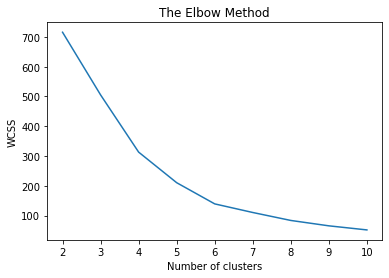

In [60]:
# Código para representar gráficamente el método del codo (Elbow Method)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Una vez visualizado el método del codo, nos quedamos con el último punto de inflexión (cambio de pendiente). En este caso, número de clusters = 6.

### 1.3.2 Definición de cluster k-means++

In [61]:
warnings.filterwarnings('ignore')
kmeans_normalizado = KMeans(n_clusters = 6, init = "k-means++", random_state = 42).fit(data_normalizada)
data_normalizada['cluster'] = kmeans_normalizado.labels_
data_normalizada.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


Calculamos e imprimimos los centroides de cada uno de los clusteres. 

In [62]:
centroids_normalizado = kmeans_normalizado.cluster_centers_
print(centroids_normalizado)

[[ 0.00000000e+00  2.25577328e-02  2.74371233e-02  1.72038517e-02
   1.00000000e+00  2.60208521e-18 -7.77156117e-16  1.00000000e+00
  -1.80411242e-16  4.94699647e-02]
 [ 0.00000000e+00  2.58647077e-02  2.91571174e-02  2.31173707e-02
   1.00000000e+00  2.60208521e-18  1.00000000e+00 -7.21644966e-16
  -2.28983499e-16  2.22044605e-16]
 [ 0.00000000e+00  5.36823635e-02  5.71665286e-02  5.03123035e-02
  -7.77156117e-16  2.81690141e-02  1.00000000e+00  2.77555756e-16
   4.16333634e-17  0.00000000e+00]
 [ 0.00000000e+00  2.42259998e-02  2.78574845e-02  1.81697311e-02
   7.47967480e-01  4.06504065e-03  0.00000000e+00  5.55111512e-17
   1.00000000e+00  1.78861789e-01]
 [ 0.00000000e+00  3.05112986e-02  3.54760461e-02  3.66071851e-02
   7.52577320e-01  2.60208521e-18  1.00000000e+00  2.22044605e-16
   4.16333634e-17  1.00000000e+00]
 [ 0.00000000e+00  2.53757083e-02  3.14442850e-02  2.61302238e-02
  -2.22044605e-16  8.13008130e-03  0.00000000e+00  1.00000000e+00
   4.16333634e-17  1.78861789e-01

In [66]:
centers_normalizado = pd.DataFrame(kmeans_normalizado.cluster_centers_, columns=['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])

centers_normalizado['freq']=data_normalizada['cluster'].value_counts()
centers_normalizado['freq_r']=data_normalizada['cluster'].value_counts(normalize=True)
print(centers_normalizado)

   visits      hits  pageviews  timeOnSite     newVisits  transactions  \
0     0.0  0.022558   0.027437    0.017204  1.000000e+00  2.602085e-18   
1     0.0  0.025865   0.029157    0.023117  1.000000e+00  2.602085e-18   
2     0.0  0.053682   0.057167    0.050312 -7.771561e-16  2.816901e-02   
3     0.0  0.024226   0.027857    0.018170  7.479675e-01  4.065041e-03   
4     0.0  0.030511   0.035476    0.036607  7.525773e-01  2.602085e-18   
5     0.0  0.025376   0.031444    0.026130 -2.220446e-16  8.130081e-03   

      isDesktop      isMobile      isTablet  isPaidTraffic  freq    freq_r  
0 -7.771561e-16  1.000000e+00 -1.804112e-16   4.946996e-02   566  0.276637  
1  1.000000e+00 -7.216450e-16 -2.289835e-16   2.220446e-16   924  0.451613  
2  1.000000e+00  2.775558e-16  4.163336e-17   0.000000e+00   213  0.104106  
3  0.000000e+00  5.551115e-17  1.000000e+00   1.788618e-01   123  0.060117  
4  1.000000e+00  2.220446e-16  4.163336e-17   1.000000e+00    97  0.047410  
5  0.000000e+00  1.

### 1.3.3 Evaluación. Silhouette score

In [64]:
data_normalizada['S_S'] = silhouette_samples(data_normalizada,data_normalizada['cluster'])
silhouette_score_mean = silhouette_score(data_normalizada,data_normalizada['cluster'])
print(silhouette_score_mean)

0.8887655567063438


In [65]:
data_normalizada

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster,S_S
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,2,0.917735
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,3,0.497915
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,0.965169
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,0.965169
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,0.965169
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0,0,0.825901
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0,1,0.809680
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0,1,0.757560
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0,1,0.805639


# 2. Clusterización K-Means init Random

## 2.1 Datos normalizados (Standard Scale)

In [71]:
data_sd_rdm = preprocessing.scale(data1)
data_sd_rdm = pd.DataFrame(data_sd_rdm, columns = ['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])
data_sd_rdm.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,0.811186,-0.712557,-0.252908,-0.300062
1,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,-1.232763,-0.712557,3.954004,-0.300062
2,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062
3,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062
4,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062


### 2.1.1 Elbow Method

In [72]:
# Encontrar el número de clusters

wcss = []
for i in range(2, 11):
    kmeans_sd_rdm = KMeans(n_clusters = i, init = 'random', random_state = 12)
    kmeans_sd_rdm.fit(data_sd_rdm)
    wcss.append(kmeans_sd_rdm.inertia_)

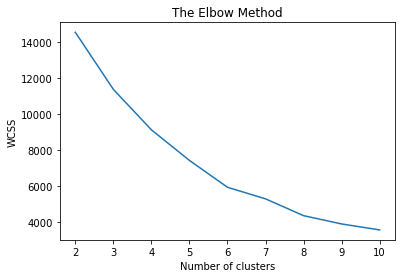

In [73]:
# Código para representar gráficamente el método del codo (Elbow Method)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 1.2.2 Definición de cluster k-means++

In [74]:
warnings.filterwarnings('ignore')
kmeans_sd_rdm = KMeans(n_clusters = 8, init = "random", random_state = 42).fit(data_sd_rdm)
data_sd_rdm['cluster'] = kmeans_sd_rdm.labels_
data_sd_rdm.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster
0,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2
1,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,-1.232763,-0.712557,3.954004,-0.300062,7
2,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,6
3,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,6
4,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,6


In [75]:
centroids_sd_rdm = kmeans_sd_rdm.cluster_centers_
print(centroids_sd_rdm)

[[ 0.00000000e+00 -2.55772085e-01 -2.66903945e-01 -1.44477706e-01
  -2.05736156e+00 -7.62995767e-02 -1.23276293e+00  1.40339625e+00
  -2.52908202e-01 -3.00062149e-01]
 [ 0.00000000e+00 -1.68383097e-01 -1.65724524e-01 -1.60875044e-01
   4.86059437e-01 -7.62995767e-02 -1.23276293e+00  1.40339625e+00
  -2.52908202e-01 -3.00062149e-01]
 [ 0.00000000e+00 -5.61921869e-02 -8.72885487e-02  7.75636194e-02
  -2.05736156e+00 -7.62995767e-02  8.11185978e-01 -7.12557125e-01
  -2.52908202e-01 -3.00062149e-01]
 [ 0.00000000e+00  3.23051462e+00  3.26519183e+00  2.57932658e+00
  -1.42315161e-01 -7.62995767e-02  2.58117451e-01 -2.39579311e-01
  -5.49358705e-02 -8.63736156e-02]
 [ 0.00000000e+00 -9.10198410e-02 -6.26112918e-02 -9.21373369e-03
  -2.84131427e-01 -7.62995767e-02  1.20273672e-01  2.69472124e-03
  -2.52908202e-01  3.33264293e+00]
 [ 0.00000000e+00  4.05463821e+00  4.43086676e+00  2.80729789e+00
  -2.05736156e+00  1.19320799e+01  3.39505461e-01 -3.87025836e-01
   7.07004166e-02 -3.00062149e-01

In [76]:
centers_sd_rdm = pd.DataFrame(kmeans_sd_rdm.cluster_centers_, columns=['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])

centers_sd_rdm['freq']=data_sd_rdm['cluster'].value_counts()
centers_sd_rdm['freq_r']=data_sd_rdm['cluster'].value_counts(normalize=True)
print(centers_sd_rdm)

   visits      hits  pageviews  timeOnSite  newVisits  transactions  \
0     0.0 -0.255772  -0.266904   -0.144478  -2.057362      -0.07630   
1     0.0 -0.168383  -0.165725   -0.160875   0.486059      -0.07630   
2     0.0 -0.056192  -0.087289    0.077564  -2.057362      -0.07630   
3     0.0  3.230515   3.265192    2.579327  -0.142315      -0.07630   
4     0.0 -0.091020  -0.062611   -0.009214  -0.284131      -0.07630   
5     0.0  4.054638   4.430867    2.807298  -2.057362      11.93208   
6     0.0 -0.190069  -0.198596   -0.165689   0.486059      -0.07630   
7     0.0 -0.201813  -0.191736   -0.214371  -0.117464      -0.07630   

   isDesktop  isMobile  isTablet  isPaidTraffic  freq    freq_r  
0  -1.232763  1.403396 -0.252908      -0.300062    97  0.047410  
1  -1.232763  1.403396 -0.252908      -0.300062   523  0.255621  
2   0.811186 -0.712557 -0.252908      -0.300062   189  0.092375  
3   0.258117 -0.239579 -0.054936      -0.086374    85  0.041544  
4   0.120274  0.002695 -0.2529

### 1.2.3 Evaluación. Silhouette score

In [77]:
data_sd_rdm['S_S'] = silhouette_samples(data_sd_rdm,data_sd_rdm['cluster'])
silhouette_score_mean = silhouette_score(data_sd_rdm,data_sd_rdm['cluster'])
print(silhouette_score_mean)

0.7461844180825216


In [78]:
data_sd_rdm

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster,S_S
0,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,2,0.791659
1,0.0,-0.398288,-0.433484,-0.355691,-2.057362,-0.0763,-1.232763,-0.712557,3.954004,-0.300062,7,0.536247
2,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,6,0.914922
3,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,6,0.914922
4,0.0,-0.398288,-0.433484,-0.355691,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,6,0.914922
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.0,2.769714,1.960329,0.851227,0.486059,-0.0763,-1.232763,1.403396,-0.252908,-0.300062,3,-0.072391
2042,0.0,2.913714,1.960329,0.504686,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,3,0.110792
2043,0.0,2.913714,2.558782,2.691478,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,3,0.316563
2044,0.0,3.057715,1.960329,-0.319842,0.486059,-0.0763,0.811186,-0.712557,-0.252908,-0.300062,3,0.033769


## 2.2 Datos normalizados (MinMaxScaler)

In [79]:
min_max_scaler = preprocessing.MinMaxScaler()
data_normalizada_rdm = min_max_scaler.fit_transform(data1)
data_normalizada_rdm = pd.DataFrame(data_normalizada_rdm) #Se convierte a DF el resultado
data_normalizada_rdm = data_normalizada_rdm.rename(columns = {0: 'visits', 1: 'hits', 2: 'pageviews', 3: 'timeOnSite', 4: 'newVisits', 5: 'transactions', 6: 'isDesktop', 7: 'isMobile', 8: 'isTablet', 9: 'isPaidTraffic'})

data_normalizada_rdm

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0


### 2.2.1 Elbow Method

In [80]:
# Encontrar el número de clusters

wcss = []
for i in range(2, 11):
    kmeans_normalizado_rdm = KMeans(n_clusters = i, init = 'random', random_state = 12)
    kmeans_normalizado_rdm.fit(data_normalizada_rdm)
    wcss.append(kmeans_normalizado_rdm.inertia_)

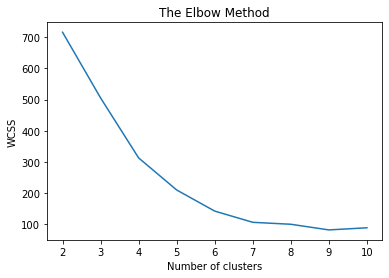

In [81]:
# Código para representar gráficamente el método del codo (Elbow Method)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 2.2.2 Definición de cluster k-means++

In [82]:
warnings.filterwarnings('ignore')
kmeans_normalizado_rdm = KMeans(n_clusters = 7, init = "random", random_state = 42).fit(data_normalizada_rdm)
data_normalizada_rdm['cluster'] = kmeans_normalizado_rdm.labels_
data_normalizada_rdm.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


In [83]:
centroids_normalizado_rdm = kmeans_normalizado_rdm.cluster_centers_
print(centroids_normalizado_rdm)

[[ 0.00000000e+00  3.05112986e-02  3.54760461e-02  3.66071851e-02
   7.52577320e-01  2.60208521e-18  1.00000000e+00  2.22044605e-16
   4.16333634e-17  1.00000000e+00]
 [ 0.00000000e+00  2.58647077e-02  2.91571174e-02  2.31173707e-02
   1.00000000e+00  3.03576608e-18  1.00000000e+00 -7.21644966e-16
  -2.35922393e-16  2.22044605e-16]
 [ 0.00000000e+00  2.25577328e-02  2.74371233e-02  1.72038517e-02
   1.00000000e+00  2.60208521e-18 -7.77156117e-16  1.00000000e+00
  -1.80411242e-16  4.94699647e-02]
 [ 0.00000000e+00  5.36823635e-02  5.71665286e-02  5.03123035e-02
  -7.77156117e-16  2.81690141e-02  1.00000000e+00  3.33066907e-16
   4.16333634e-17  0.00000000e+00]
 [ 0.00000000e+00  2.53757083e-02  3.14442850e-02  2.61302238e-02
  -2.22044605e-16  8.13008130e-03  0.00000000e+00  1.00000000e+00
   4.16333634e-17  1.78861789e-01]
 [ 0.00000000e+00  1.95432587e-02  2.55754476e-02  1.46219913e-02
   1.00000000e+00  2.16840434e-18 -1.11022302e-16 -5.55111512e-17
   1.00000000e+00  1.73913043e-01

In [84]:
centers_normalizado_rdm = pd.DataFrame(kmeans_normalizado_rdm.cluster_centers_, columns=['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])

centers_normalizado_rdm['freq']=data_normalizada_rdm['cluster'].value_counts()
centers_normalizado_rdm['freq_r']=data_normalizada_rdm['cluster'].value_counts(normalize=True)
print(centers_normalizado_rdm)

   visits      hits  pageviews  timeOnSite     newVisits  transactions  \
0     0.0  0.030511   0.035476    0.036607  7.525773e-01  2.602085e-18   
1     0.0  0.025865   0.029157    0.023117  1.000000e+00  3.035766e-18   
2     0.0  0.022558   0.027437    0.017204  1.000000e+00  2.602085e-18   
3     0.0  0.053682   0.057167    0.050312 -7.771561e-16  2.816901e-02   
4     0.0  0.025376   0.031444    0.026130 -2.220446e-16  8.130081e-03   
5     0.0  0.019543   0.025575    0.014622  1.000000e+00  2.168404e-18   
6     0.0  0.038123   0.034630    0.028699  1.110223e-16  1.612903e-02   

      isDesktop      isMobile      isTablet  isPaidTraffic  freq    freq_r  
0  1.000000e+00  2.220446e-16  4.163336e-17   1.000000e+00    97  0.047410  
1  1.000000e+00 -7.216450e-16 -2.359224e-16   2.220446e-16   924  0.451613  
2 -7.771561e-16  1.000000e+00 -1.804112e-16   4.946996e-02   566  0.276637  
3  1.000000e+00  3.330669e-16  4.163336e-17   0.000000e+00   213  0.104106  
4  0.000000e+00  1.000

### 2.2.3 Evaluación. Silhouette score

In [85]:
data_normalizada_rdm['S_S'] = silhouette_samples(data_normalizada_rdm,data_normalizada_rdm['cluster'])
silhouette_score_mean = silhouette_score(data_normalizada_rdm,data_normalizada_rdm['cluster'])
print(silhouette_score_mean)

0.8958264749653387


In [86]:
data_normalizada_rdm

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster,S_S
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,3,0.934684
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,6,0.815758
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,0.966662
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,0.966662
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1,0.966662
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0,2,0.825901
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0,1,0.818438
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0,1,0.768834
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0,1,0.814518


## 2.3 Datos sin normalizar

In [87]:
data_sin_normalizar = data1

data_sin_normalizar

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,1,1,1,0.0,0.0,0.0,1,0,0,0
1,1,1,1,0.0,0.0,0.0,0,0,1,0
2,1,1,1,0.0,1.0,0.0,1,0,0,0
3,1,1,1,0.0,1.0,0.0,1,0,0,0
4,1,1,1,0.0,1.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2041,1,23,13,404.0,1.0,0.0,0,1,0,0
2042,1,24,13,288.0,1.0,0.0,1,0,0,0
2043,1,24,16,1020.0,1.0,0.0,1,0,0,0
2044,1,25,13,12.0,1.0,0.0,1,0,0,0


### 2.3.1 Elbow Method

In [88]:
# Encontrar el número de clusters

wcss = []
for i in range(2, 11):
    kmeans_sn = KMeans(n_clusters = i, init = 'random', random_state = 12)
    kmeans_sn.fit(data_sin_normalizar)
    wcss.append(kmeans_sn.inertia_)

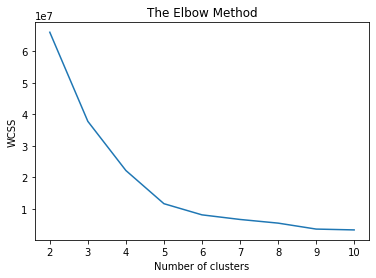

In [89]:
# Código para representar gráficamente el método del codo (Elbow Method)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 2.3.2 Definición de cluster k-means++

In [90]:
warnings.filterwarnings('ignore')
kmeans_sn = KMeans(n_clusters = 6, init = "random", random_state = 42).fit(data_sin_normalizar)
data_sin_normalizar['cluster'] = kmeans_sn.labels_
data_sin_normalizar.head()

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster
0,1,1,1,0.0,0.0,0.0,1,0,0,0,0
1,1,1,1,0.0,0.0,0.0,0,0,1,0,0
2,1,1,1,0.0,1.0,0.0,1,0,0,0,0
3,1,1,1,0.0,1.0,0.0,1,0,0,0,0
4,1,1,1,0.0,1.0,0.0,1,0,0,0,0


In [91]:
centroids_sn = kmeans_sn.cluster_centers_
print(centroids_sn)

[[1.00000000e+00 1.63844685e+00 1.53469128e+00 9.32845321e+00
  8.21133036e-01 6.93889390e-18 5.88160407e-01 3.50095481e-01
  6.17441120e-02 7.44748568e-02]
 [1.00000000e+00 1.26578947e+01 1.01228070e+01 4.53780702e+02
  7.71929825e-01 4.38596491e-02 6.66666667e-01 2.89473684e-01
  4.38596491e-02 8.77192982e-02]
 [1.00000000e+00 7.23484848e+00 5.84469697e+00 1.62140152e+02
  8.33333333e-01 5.20417043e-18 6.13636364e-01 3.18181818e-01
  6.81818182e-02 1.17424242e-01]
 [1.00000000e+00 5.95000000e+01 4.15000000e+01 4.46250000e+03
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.77037037e+01 1.37222222e+01 9.85351852e+02
  6.66666667e-01 9.25925926e-02 7.22222222e-01 2.59259259e-01
  1.85185185e-02 9.25925926e-02]
 [1.00000000e+00 1.71463415e+01 1.36585366e+01 1.76287805e+03
  4.63414634e-01 1.21951220e-01 7.56097561e-01 1.95121951e-01
  4.87804878e-02 1.46341463e-01]]


In [92]:
centers_sn = pd.DataFrame(kmeans_sn.cluster_centers_, columns=['visits', 'hits', 'pageviews', 'timeOnSite', 'newVisits', 'transactions', 'isDesktop', 'isMobile', 'isTablet', 'isPaidTraffic'])

centers_sn['freq']=data_sin_normalizar['cluster'].value_counts()
centers_sn['freq_r']=data_sin_normalizar['cluster'].value_counts(normalize=True)
print(centers_sn)

   visits       hits  pageviews   timeOnSite  newVisits  transactions  \
0     1.0   1.638447   1.534691     9.328453   0.821133  6.938894e-18   
1     1.0  12.657895  10.122807   453.780702   0.771930  4.385965e-02   
2     1.0   7.234848   5.844697   162.140152   0.833333  5.204170e-18   
3     1.0  59.500000  41.500000  4462.500000   1.000000  0.000000e+00   
4     1.0  17.703704  13.722222   985.351852   0.666667  9.259259e-02   
5     1.0  17.146341  13.658537  1762.878049   0.463415  1.219512e-01   

   isDesktop  isMobile  isTablet  isPaidTraffic  freq    freq_r  
0   0.588160  0.350095  0.061744       0.074475  1571  0.767840  
1   0.666667  0.289474  0.043860       0.087719   114  0.055718  
2   0.613636  0.318182  0.068182       0.117424   264  0.129032  
3   1.000000  0.000000  0.000000       0.000000     2  0.000978  
4   0.722222  0.259259  0.018519       0.092593    54  0.026393  
5   0.756098  0.195122  0.048780       0.146341    41  0.020039  


### 2.3.3 Evaluación. Silhouette score

In [93]:
data_sin_normalizar['S_S'] = silhouette_samples(data_sin_normalizar,data_sin_normalizar['cluster'])
silhouette_score_mean = silhouette_score(data_sin_normalizar,data_sin_normalizar['cluster'])
print(silhouette_score_mean)

0.7883099346791167


In [94]:
data_sin_normalizar

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster,S_S
0,1,1,1,0.0,0.0,0.0,1,0,0,0,0,0.936677
1,1,1,1,0.0,0.0,0.0,0,0,1,0,0,0.934626
2,1,1,1,0.0,1.0,0.0,1,0,0,0,0,0.938847
3,1,1,1,0.0,1.0,0.0,1,0,0,0,0,0.938847
4,1,1,1,0.0,1.0,0.0,1,0,0,0,0,0.938847
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1,23,13,404.0,1.0,0.0,0,1,0,0,1,0.621130
2042,1,24,13,288.0,1.0,0.0,1,0,0,0,2,0.227388
2043,1,24,16,1020.0,1.0,0.0,1,0,0,0,4,0.750985
2044,1,25,13,12.0,1.0,0.0,1,0,0,0,0,0.792239


# 3. Cluster jerárquico

In [37]:
data1 = data
print(data1)

      visits  hits  pageviews  timeOnSite  newVisits  transactions  isDesktop  \
0          1     1          1         0.0        0.0           0.0          1   
1          1     1          1         0.0        0.0           0.0          0   
2          1     1          1         0.0        1.0           0.0          1   
3          1     1          1         0.0        1.0           0.0          1   
4          1     1          1         0.0        1.0           0.0          1   
...      ...   ...        ...         ...        ...           ...        ...   
2041       1    23         13       404.0        1.0           0.0          0   
2042       1    24         13       288.0        1.0           0.0          1   
2043       1    24         16      1020.0        1.0           0.0          1   
2044       1    25         13        12.0        1.0           0.0          1   
2045       1    43         25       151.0        1.0           0.0          1   

      isMobile  isTablet  i

## 3.1 Parámetros Euclidean y Ward 

### 3.1.1 Normalización de datos

In [38]:
min_max_scaler = preprocessing.MinMaxScaler()
data_normalizada_cluster_jerarquico = min_max_scaler.fit_transform(data1)
data_normalizada_cluster_jerarquico = pd.DataFrame(data_normalizada_cluster_jerarquico) #Se convierte a DF el resultado
data_normalizada_cluster_jerarquico = data_normalizada_cluster_jerarquico.rename(columns = {0: 'visits', 1: 'hits', 2: 'pageviews', 3: 'timeOnSite', 4: 'newVisits', 5: 'transactions', 6: 'isDesktop', 7: 'isMobile', 8: 'isTablet', 9: 'isPaidTraffic'})

data_normalizada_cluster_jerarquico

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0


### 3.1.2 Construcción del dendrograma

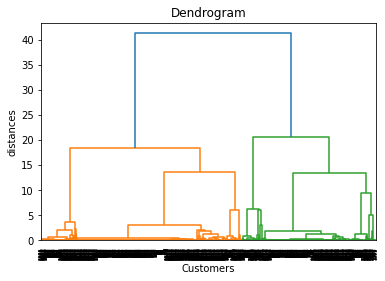

In [41]:
dendrogram = sch.dendrogram(sch.linkage(data_normalizada_cluster_jerarquico, method  = "ward", metric = "euclidean"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

### 3.1.3 Definición de clusters y evaluación

In [43]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(data_normalizada_cluster_jerarquico)
data_normalizada_cluster_jerarquico['cluster_hc']=y_hc
data_normalizada_cluster_jerarquico['S_S_hc'] = silhouette_samples(data_normalizada_cluster_jerarquico,data_normalizada_cluster_jerarquico['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(data_normalizada_cluster_jerarquico,data_normalizada_cluster_jerarquico['cluster_hc'])
print(silhouette_score_mean_hc)

0.8136064049531653


In [44]:
Centers_mean_hc=data_normalizada_cluster_jerarquico.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=data_normalizada_cluster_jerarquico['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=data_normalizada_cluster_jerarquico['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,
0,0.0,0.025352,0.028878,0.023578,0.976471,0.000000,1.0,0.0,0.0,0.095098,0.862189,1020,0.498534
1,0.0,0.023061,0.028152,0.018797,0.821480,0.001451,0.0,1.0,0.0,0.072569,0.766338,689,0.336755
2,0.0,0.024226,0.027857,0.018170,0.747967,0.004065,0.0,0.0,1.0,0.178862,0.649472,123,0.060117
3,0.0,0.058104,0.061229,0.054104,0.004673,0.028037,1.0,0.0,0.0,0.000000,0.899374,214,0.104594


In [45]:
min_max_scaler = preprocessing.MinMaxScaler()
data_normalizada_cluster_jerarquico_2 = min_max_scaler.fit_transform(data1)
data_normalizada_cluster_jerarquico_2 = pd.DataFrame(data_normalizada_cluster_jerarquico_2) #Se convierte a DF el resultado
data_normalizada_cluster_jerarquico_2 = data_normalizada_cluster_jerarquico_2.rename(columns = {0: 'visits', 1: 'hits', 2: 'pageviews', 3: 'timeOnSite', 4: 'newVisits', 5: 'transactions', 6: 'isDesktop', 7: 'isMobile', 8: 'isTablet', 9: 'isPaidTraffic'})

data_normalizada_cluster_jerarquico_2

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0


In [46]:
hc_2 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
y_hc_2=hc_2.fit_predict(data_normalizada_cluster_jerarquico_2)
data_normalizada_cluster_jerarquico_2['cluster_hc']=y_hc_2
data_normalizada_cluster_jerarquico_2['S_S_hc'] = silhouette_samples(data_normalizada_cluster_jerarquico_2,data_normalizada_cluster_jerarquico_2['cluster_hc'])
silhouette_score_mean_hc_2 = silhouette_score(data_normalizada_cluster_jerarquico_2,data_normalizada_cluster_jerarquico_2['cluster_hc'])
print(silhouette_score_mean_hc_2)

0.8895625698082996


In [47]:
Centers_mean_hc_2=data_normalizada_cluster_jerarquico_2.groupby('cluster_hc').mean()
Centers_mean_hc_2['freq_hc']=data_normalizada_cluster_jerarquico_2['cluster_hc'].value_counts()
Centers_mean_hc_2['freq_r_hc']=data_normalizada_cluster_jerarquico_2['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc_2

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,
0,0.0,0.026958,0.033502,0.025192,0.185430,0.006623,0.0,1.0,0.0,0.331126,0.671794,151,0.073803
1,0.0,0.030511,0.035476,0.036607,0.752577,0.000000,1.0,0.0,0.0,1.000000,0.779132,97,0.047410
2,0.0,0.024226,0.027857,0.018170,0.747967,0.004065,0.0,0.0,1.0,0.178862,0.656856,123,0.060117
3,0.0,0.058104,0.061229,0.054104,0.004673,0.028037,1.0,0.0,0.0,0.000000,0.862284,214,0.104594
4,0.0,0.024809,0.028185,0.022209,1.000000,0.000000,1.0,0.0,0.0,0.000000,0.944102,923,0.451124
5,0.0,0.021967,0.026651,0.017003,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.961819,538,0.262952


# 4. DBSCAN

In [90]:
data1 = data
print(data1)

      visits  hits  pageviews  timeOnSite  newVisits  transactions  isDesktop  \
0          1     1          1         0.0        0.0           0.0          1   
1          1     1          1         0.0        0.0           0.0          0   
2          1     1          1         0.0        1.0           0.0          1   
3          1     1          1         0.0        1.0           0.0          1   
4          1     1          1         0.0        1.0           0.0          1   
...      ...   ...        ...         ...        ...           ...        ...   
2041       1    23         13       404.0        1.0           0.0          0   
2042       1    24         13       288.0        1.0           0.0          1   
2043       1    24         16      1020.0        1.0           0.0          1   
2044       1    25         13        12.0        1.0           0.0          1   
2045       1    43         25       151.0        1.0           0.0          1   

      isMobile  isTablet  i

In [91]:
min_max_scaler = preprocessing.MinMaxScaler()
data_normalizada_Epsilon = min_max_scaler.fit_transform(data1)
data_normalizada_Epsilon = pd.DataFrame(data_normalizada_Epsilon) #Se convierte a DF el resultado
data_normalizada_Epsilon = data_normalizada_Epsilon.rename(columns = {0: 'visits', 1: 'hits', 2: 'pageviews', 3: 'timeOnSite', 4: 'newVisits', 5: 'transactions', 6: 'isDesktop', 7: 'isMobile', 8: 'isTablet', 9: 'isPaidTraffic'})

data_normalizada_Epsilon

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0


### 4.1 Búsqueda del valor óptimo del parámetro Epsilon

In [92]:
dbscan = DBSCAN(eps=0.1, min_samples=15)
y_dbs = dbscan.fit_predict(data_normalizada_Epsilon)
silhouette_score(data_normalizada_Epsilon, y_dbs)

0.8673297070487549

In [93]:
print(y_dbs)

[ 0  1  2 ... -1  2 -1]


In [94]:
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=15)
    y_db = db.fit_predict(data_normalizada_Epsilon)
    core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
    core_sample_mask[db.core_sample_indices_]=True
    cluster=db.labels_
    eval = silhouette_score(data_normalizada_Epsilon, y_db)
    print(round(eps,2), end=" ")
    print(eval)

1.0 0.7017461557150322
0.5 0.9079742628986804
0.33 0.9067714881553969
0.25 0.90441977035916
0.2 0.9018839050987321
0.17 0.8975846208606172
0.14 0.890900213222837
0.12 0.880348351978749
0.11 0.8764218593842835
0.1 0.8673297070487549


Podemos calcular la distancia de cada punto a sus k-vecinos más cercanos usando NearestNeighbors. El punto en sí mismo está incluido en "n_neighbors". El método kneighbors devuelve dos arrays, uno que contiene la distancia a los "n_neighbors" puntos más cercanos y el otro que contiene el índice de cada uno de esos puntos. 

In [95]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=15)
nbrs = neigh.fit(data_normalizada_Epsilon)
distancias, indices = nbrs.kneighbors(data_normalizada_Epsilon)

In [96]:
print(distancias)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.01787124 0.01796231]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04577055 0.06726688 ... 0.14597036 0.15019316 0.15039033]
 [0.         0.05845136 0.06724221 ... 0.11242097 0.12059548 0.12116964]
 [0.         0.10369484 0.15416522 ... 0.23821387 0.24260448 0.2537876 ]]


In [97]:
print(indices)

[[ 131  147   87 ...   93  106   89]
 [  34  516    1 ...  299 1154 1081]
 [  14   22   19 ...   12   13   10]
 ...
 [2043 1732 1707 ... 1676 1677 1712]
 [2044 2042 1725 ... 1712 1664 1674]
 [2045 1768 1765 ... 1771 1757 1720]]


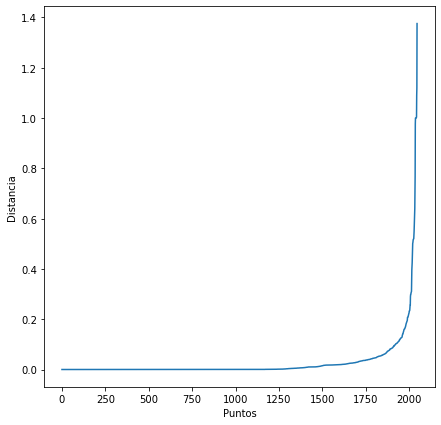

In [98]:
distancias = np.sort(distancias, axis=0) #ordena las distancias de menor a mayor
distancias = distancias[:, 9] #me quedo con la última columna, la que tiene la mayor distancia

fig = plt.figure(figsize=(7, 7))
plt.plot(distancias)
plt.xlabel("Puntos")
plt.ylabel("Distancia")

plt.savefig("Curva_de_distancias.png", dpi=300)

### 4.2 Definición de clusters y evaluación

In [99]:
dbscan = DBSCAN(eps=0.5, min_samples=15)
y_dbs = dbscan.fit_predict(data_normalizada_Epsilon)
silhouette_score(data_normalizada_Epsilon, y_dbs)

0.9079742628986804

In [100]:
data_normalizada_Epsilon['cluster_dbs']=y_dbs
data_normalizada_Epsilon['S_S_dbs'] = silhouette_samples(data_normalizada_Epsilon,data_normalizada_Epsilon['cluster_dbs'])
data_normalizada_Epsilon

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,cluster_dbs,S_S_dbs
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0,0.952636
1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1,0.962091
2,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,2,0.972797
3,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,2,0.972797
4,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,2,0.972797
...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.0,0.222222,0.176471,0.084272,1.0,0.0,0.0,1.0,0.0,0.0,3,0.814425
2042,0.0,0.232323,0.176471,0.060075,1.0,0.0,1.0,0.0,0.0,0.0,2,0.843884
2043,0.0,0.232323,0.220588,0.212766,1.0,0.0,1.0,0.0,0.0,0.0,2,0.800379
2044,0.0,0.242424,0.176471,0.002503,1.0,0.0,1.0,0.0,0.0,0.0,2,0.840443


In [101]:
Centers_mean_dbs=data_normalizada_Epsilon.groupby('cluster_dbs').mean()
Centers_mean_dbs['freq_dbs']=data_normalizada_Epsilon['cluster_dbs'].value_counts()
Centers_mean_dbs['freq_r_dbs']=data_normalizada_Epsilon['cluster_dbs'].value_counts(normalize=True)
Centers_mean_dbs

,visits,hits,pageviews,timeOnSite,newVisits,transactions,isDesktop,isMobile,isTablet,isPaidTraffic,S_S_dbs,freq_dbs,freq_r_dbs
cluster_dbs,,,,,,,,,,,,,
-1,0.0,0.296443,0.321611,0.237462,0.086957,0.326087,0.565217,0.130435,0.304348,0.347826,0.128008,23,0.011241
0,0.0,0.039757,0.041437,0.040923,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.924014,203,0.099218
1,0.0,0.036616,0.030025,0.031567,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.937711,24,0.011730
2,0.0,0.024639,0.027928,0.021148,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.954775,922,0.450635
3,0.0,0.021967,0.026651,0.017003,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.953369,538,0.262952
4,0.0,0.014284,0.018568,0.019960,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.958240,99,0.048387
5,0.0,0.021265,0.027477,0.015027,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.953844,76,0.037146
6,0.0,0.011364,0.016544,0.012698,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.970763,16,0.007820
7,0.0,0.026290,0.031426,0.029383,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.951158,73,0.035679
